### Classificação de Dados usando Modelos de Aprendizado de Máquina e Rede Neural Artificial
### Professor Carlos Santos - Instituto Federal Farroupilha Câmpus Alegrete

### ETAPA 1 - Entendimento do Negócio

In [93]:
'''
Previsão de Resposta a Campanhas de Marketing

Este notebook utiliza diferentes algoritmos de classificação para prever se um cliente aceitará ou não uma oferta de depósito a prazo de um banco,
com base no conjunto de dados **Bank Marketing Dataset**.

Objetivo:
 - Classificar clientes como `sim` ou `não` para a aceitação da campanha.

Algoritmos Utilizados:
 - Naive Bayes
 - Árvore de Decisão
 - Random Forest
 - Gradient Boosting
 - K-Nearest Neighbors (KNN)
 - Support Vector Machines (SVM)
 - Rede Neural Artificial

Metodologia utilizada:
 - CRISP-DM (Cross-Industry Standard Process for Data Mining)
 '''

'\nPrevisão de Resposta a Campanhas de Marketing\n\nEste notebook utiliza diferentes algoritmos de classificação para prever se um cliente aceitará ou não uma oferta de depósito a prazo de um banco,\ncom base no conjunto de dados **Bank Marketing Dataset**.\n\nObjetivo:\n - Classificar clientes como `sim` ou `não` para a aceitação da campanha.\n\nAlgoritmos Utilizados:\n - Naive Bayes\n - Árvore de Decisão\n - Random Forest\n - Gradient Boosting\n - K-Nearest Neighbors (KNN)\n - Support Vector Machines (SVM)\n - Rede Neural Artificial\n\nMetodologia utilizada:\n - CRISP-DM (Cross-Industry Standard Process for Data Mining)\n '

### ETAPA 2 - Entendimento dos Dados

In [94]:
'''
Informações sobre o conjunto de dados Bank Marketing Dataset

- Tamanho: Contém cerca de 41.000 registros com 21 colunas. Pode ser facilmente carregado na memória e manipulado com ferramentas padrão como pandas.
- Colunas: descrevem atributos como idade, saldo, duração da campanha, entre outros, relacionados à resposta do cliente à campanha de marketing (compra ou não do produto).
- Formato: formato CSV, pronto para ser usado diretamente com pandas.
- Relacionamento Claro com Negócios: O objetivo é prever se um cliente irá aceitar uma oferta de depósito a prazo, o que é muito próximo do cenário de previsão de compras.
Um depósito a prazo é uma modalidade de depósito em que o cliente de uma instituição financeira recebe juros em troca de manter recursos monetários depositados por um
prazo pré-determinado.
'''

'\nInformações sobre o conjunto de dados Bank Marketing Dataset\n\n- Tamanho: Contém cerca de 41.000 registros com 21 colunas. Pode ser facilmente carregado na memória e manipulado com ferramentas padrão como pandas.\n- Colunas: descrevem atributos como idade, saldo, duração da campanha, entre outros, relacionados à resposta do cliente à campanha de marketing (compra ou não do produto).\n- Formato: formato CSV, pronto para ser usado diretamente com pandas.\n- Relacionamento Claro com Negócios: O objetivo é prever se um cliente irá aceitar uma oferta de depósito a prazo, o que é muito próximo do cenário de previsão de compras.\nUm depósito a prazo é uma modalidade de depósito em que o cliente de uma instituição financeira recebe juros em troca de manter recursos monetários depositados por um\nprazo pré-determinado.\n'

In [95]:
# Importação de Bibliotecas

import pandas as pd  # Manipulação de dados
import numpy as np  # Operações matemáticas e manipulação de arrays
from sklearn.model_selection import train_test_split  # Divisão de conjuntos de dados
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normalização e codificação
from sklearn.tree import DecisionTreeClassifier  # Modelo de Árvore de Decisão
from sklearn.neighbors import KNeighborsClassifier  # Modelo KNN
from sklearn.ensemble import RandomForestClassifier  # Modelo Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Métricas de avaliação
import matplotlib.pyplot as plt  # Visualização de dados
import seaborn as sns  # Gráficos estilizados
from tensorflow.keras.models import Sequential  # Criação de redes neurais sequenciais
from tensorflow.keras.layers import Dense, Input  # Camadas densas e de entrada para redes neurais
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Machines
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting

### ETAPA 3 - Preparação dos Dados

In [96]:
# Pré-Processamento dos Dados

# Carregando o conjunto de dados manualmente no Google Colab
from google.colab import files
import io

# Fazer upload do arquivo
print("Por favor, carregue o arquivo CSV do conjunto de dados.")
uploaded = files.upload()

# Identificando o nome do arquivo carregado
filename = list(uploaded.keys())[0]

# Carregar o arquivo em um DataFrame pandas
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";")

'''
CSV, JSON e XML são formatos de armazenamento e troca de dados, cada um com características distintas:
CSV (Comma-Separated Values): Formato simples e leve, ideal para armazenar dados tabulares, mas sem suporte a hierarquias ou metadados.
JSON (JavaScript Object Notation): Estruturado, leve e fácil de ler, suporta hierarquias e é amplamente usado em APIs e aplicações web.
XML (Extensible Markup Language): Estruturado e robusto, permite metadados e validação com schemas, mas é mais verboso que JSON.
'''

# Exibindo as primeiras linhas para entender os dados
print("Visualizando as primeiras linhas do conjunto de dados:")
print(data.head().iloc[:, :5])    # .iloc é usado para indexação baseada em posição (linha, coluna).

# Verificar a quantidade de linhas e colunas
print(f"Quantidade de linhas: {data.shape[0]}")   # No pandas quando se usa o shape ele retorna (linhas, colunas)
print(f"Quantidade de colunas: {data.shape[1]}")

# Verificar os nomes das colunas
print("\nNomes das colunas:")
print(data.columns.tolist())

# Visualizar os tipos de dados de cada coluna
print("\nTipos de dados das colunas:")
print(data.dtypes)

Por favor, carregue o arquivo CSV do conjunto de dados.


Saving bank-additional-full-ptbr.csv to bank-additional-full-ptbr (1).csv
Visualizando as primeiras linhas do conjunto de dados:
   idade            profissao estado_civil          escolaridade  inadimplente
0     56  empregada doméstica       casado  fundamental (4 anos)           não
1     57             serviços       casado          ensino médio  desconhecido
2     37             serviços       casado          ensino médio           não
3     40       administrativo       casado  fundamental (6 anos)           não
4     56             serviços       casado          ensino médio           não
Quantidade de linhas: 41188
Quantidade de colunas: 21

Nomes das colunas:
['idade', 'profissao', 'estado_civil', 'escolaridade', 'inadimplente', 'emprestimo_habitacional', 'emprestimo_pessoal', 'tipo_contato', 'mes_contato', 'dia_da_semana', 'duracao_contato', 'numero_contatos', 'dias_ultimo_contato', 'contatos_anteriores', 'resultado_campanha_anterior', 'taxa_variacao_emprego', 'indice_precos_

In [97]:
'''
Explicação do dataset:

O dataset é do tipo bancário, com informações sobre campanhas de marketing.
A coluna 'assinou_deposito' indica se o cliente assinou (ou não) um depósito a prazo após a campanha.


Nomes das colunas:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Nomes das colunas (traduzidas):
['idade', 'profissao', 'estado_civil', 'escolaridade', 'inadimplente', 'emprestimo_habitacional', 'emprestimo_pessoal',
'tipo_contato', 'mes_contato', 'dia_da_semana', 'duracao_contato', 'numero_contatos', 'dias_ultimo_contato', 'contatos_anteriores',
'resultado_campanha_anterior', 'taxa_variacao_emprego', 'indice_precos_consumidor', 'indice_confianca_consumidor', 'euribor_3m',
'numero_empregados', 'assinou_deposito']

Esta coluna contém valores como:
"yes" → cliente assinou
"no" → cliente não assinou

Conclusão:
y é a variável dependente, ou seja, a que queremos prever (classificação binária).
Todas as outras colunas (age, job, duration, etc.) são variáveis independentes (features ou preditoras).
'''

'\nExplicação do dataset:\n\nO dataset é do tipo bancário, com informações sobre campanhas de marketing.\nA coluna \'assinou_deposito\' indica se o cliente assinou (ou não) um depósito a prazo após a campanha.\n\n\nNomes das colunas:\n[\'age\', \'job\', \'marital\', \'education\', \'default\', \'housing\', \'loan\', \'contact\', \'month\', \'day_of_week\', \'duration\', \'campaign\', \'pdays\', \n\'previous\', \'poutcome\', \'emp.var.rate\', \'cons.price.idx\', \'cons.conf.idx\', \'euribor3m\', \'nr.employed\', \'y\']\n\n\nNomes das colunas (traduzidas):\n[\'idade\', \'profissao\', \'estado_civil\', \'escolaridade\', \'inadimplente\', \'emprestimo_habitacional\', \'emprestimo_pessoal\', \n\'tipo_contato\', \'mes_contato\', \'dia_da_semana\', \'duracao_contato\', \'numero_contatos\', \'dias_ultimo_contato\', \'contatos_anteriores\',\n\'resultado_campanha_anterior\', \'taxa_variacao_emprego\', \'indice_precos_consumidor\', \'indice_confianca_consumidor\', \'euribor_3m\', \n\'numero_empre

In [98]:
# Verificando valores ausentes
print("Verificando valores ausentes:")
print(data.isnull().sum())


'''
Identifica colunas com valores categóricos.
Cria codificadores para elas.
Transforma os textos em números (essencial para modelos de machine learning, que só trabalham com números).
'''
# Codificação de variáveis categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Separando os atributos (X) e o rótulo (y)

# X = data.drop("y", axis=1)  # Atributos (variáveis independentes)
X = data.drop("assinou_deposito", axis=1)  # Atributos (variáveis independentes)
# y = data["y"]  # Rótulo (alvo) (variável dependente)
y = data["assinou_deposito"]  # Rótulo (alvo) (variável dependente)

'''
X (atributos/entradas)
y (rótulo/saída)

X e y são divigidos em subconjuntos:
X_train, y_train: usados para treinar o modelo.
X_test, y_test: usados para testar/avaliar o modelo.

test_size=0.3
Define que 30% dos dados vão para o conjunto de teste.
Os 70% restantes vão para o treino.
random_state=42. Garante que a divisão entre treino e teste seja reprodutível.
stratify=y. Essa é uma opção muito importante em problemas de classificação. Garante que a proporção das classes seja a mesma nos dois conjuntos: treino e teste.
Isso evita viés, especialmente quando os dados são desbalanceados (ex: 90% da classe 0 e 10% da classe 1).
'''
# Dividindo os dados em conjunto de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizando os dados para melhorar o desempenho dos modelos

'''
Cria um bjeto chamado scaler que será usado para padronizar (normalizar) os dados numéricos, usando a técnica conhecida como padronização z-score
que pega seus números e ajusta eles para que fiquem numa escala comum.
Assim, números muito grandes ou muito pequenos ficam mais comparáveis entre si, ajudando o classificador a entender melhor os dados.
Modelos de machine learning (especialmente redes neurais, SVMs, KNN) funcionam melhor e mais rápido quando os dados estão em uma escala similar.
Evita que variáveis com valores grandes (ex: salário em milhares) dominem outras com valores menores (ex: idade).
'''
scaler = StandardScaler()  # Criando o objeto de normalização
X_train = scaler.fit_transform(X_train)  # Ajustando e transformando os dados de treino
X_test = scaler.transform(X_test)  # Transformando os dados de teste com os mesmos parâmetros


Verificando valores ausentes:
idade                          0
profissao                      0
estado_civil                   0
escolaridade                   0
inadimplente                   0
emprestimo_habitacional        0
emprestimo_pessoal             0
tipo_contato                   0
mes_contato                    0
dia_da_semana                  0
duracao_contato                0
numero_contatos                0
dias_ultimo_contato            0
contatos_anteriores            0
resultado_campanha_anterior    0
taxa_variacao_emprego          0
indice_precos_consumidor       0
indice_confianca_consumidor    0
euribor_3m                     0
numero_empregados              0
assinou_deposito               0
dtype: int64


<ipython-input-99-4037002354>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_plot, x='assinou_deposito', palette='pastel')


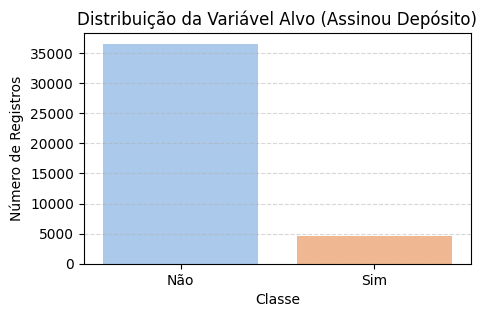

In [99]:
# Gráfico de distribuição da variável alvo com a a frequência de adesão à campanha publicitária
# Veja o quão estão desbalanceados a quantidade de exemplos das classes! Se não tratado pode criar viés de classificação na classe majoritária!

# Mapear 0 → "Não" e 1 → "Sim"
data_plot = data.copy()
data_plot['assinou_deposito'] = data_plot['assinou_deposito'].map({0: 'Não', 1: 'Sim'})

# Plotar o gráfico
plt.figure(figsize=(5, 3))
sns.countplot(data=data_plot, x='assinou_deposito', palette='pastel')
plt.title('Distribuição da Variável Alvo (Assinou Depósito)')
plt.xlabel('Classe')
plt.ylabel('Número de Registros')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### ETAPAS 4 e 5 - Modelagem e Avaliação

Modelo: Naive Bayes
Matriz de Confusão:
[[9662 1303]
 [ 545  847]]
Acurácia: 0.85
--------------------------------------------------
Modelo: Árvore de Decisão
Matriz de Confusão:
[[10265   700]
 [  670   722]]
Acurácia: 0.89
--------------------------------------------------
Modelo: Random Forest
Matriz de Confusão:
[[10634   331]
 [  688   704]]
Acurácia: 0.92
--------------------------------------------------
Modelo: Gradient Boosting
Matriz de Confusão:
[[10613   352]
 [  665   727]]
Acurácia: 0.92
--------------------------------------------------
Modelo: K-Nearest Neighbors
Matriz de Confusão:
[[10599   366]
 [  860   532]]
Acurácia: 0.90
--------------------------------------------------
Modelo: Support Vector Machines (SVM)
Matriz de Confusão:
[[10731   234]
 [  876   516]]
Acurácia: 0.91
--------------------------------------------------
Resultados da Rede Neural:
Acurácia no conjunto de teste: 0.91
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


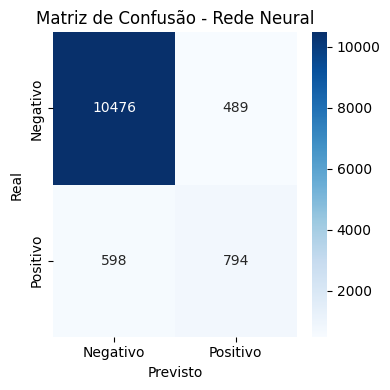

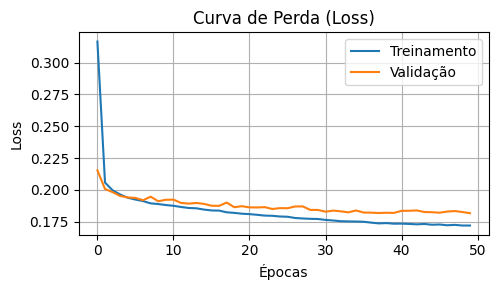

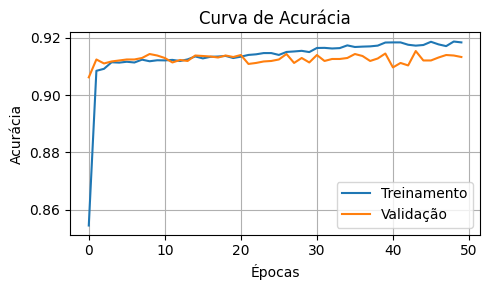

In [100]:
# Treinamento e Avaliação dos Modelos

# Função para treinar e avaliar os modelos
def train_and_evaluate_model(model, model_name):
    # Treinando o modelo
    model.fit(X_train, y_train)   # X_train são as entradas (exemplos de dados). y_train	são as saídas (respostas corretas)

    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)  # y_pred	são as respostas que o modelo deu. X_test são os novos exemplos para o modelo classificar
    y_pred = y_pred.astype(int)  # Garantindo que as previsões sejam inteiros

    # Avaliação do desempenho
    print(f"Modelo: {model_name}")  # imprime o nome do modelo
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))   # y_test são as classificações corretas dos exemplos novos (Ground Truth) e y_pred é a classificação que o modelo fez (a previsão do modelo).
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print("-" * 50) # imprimi uma linha horizontal com 50 traços


### Algoritmos de Machine Learning ###

# Naive Bayes
nb_model = GaussianNB()  # criando um modelo de aprendizado de máquina usando o algoritmo Naive Bayes
train_and_evaluate_model(nb_model, "Naive Bayes")

# Árvore de Decisão
# random_state=42 é utilizado para o algoritmo use sempre a mesma sequência de aleatoriedade do conjunto de dados para que o resultado seja igual toda vez. É importante usar o mesmo número para que o resultado seja reproduzível.
tree_model = DecisionTreeClassifier(random_state=42)  # criando um modelo de aprendizado de máquina usando o algoritmo Árvore de Decisão.
train_and_evaluate_model(tree_model, "Árvore de Decisão")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)  # criando um modelo de aprendizado de máquina usando o algoritmo Random Forest
train_and_evaluate_model(rf_model, "Random Forest")

# Treinamento e avaliação - Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)  # criando um modelo de aprendizado de máquina usando o algoritmo Gradient Boosting
train_and_evaluate_model(gb_model, "Gradient Boosting")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()  # criando um modelo de aprendizado de máquina usando o algoritmo K-Nearest Neighbors
train_and_evaluate_model(knn_model, "K-Nearest Neighbors")

# Support Vector Machines (SVM)
# rbf significa "Radial Basis Function". É o tipo de kernel mais usado e funciona bem quando os dados não são separáveis por uma linha reta (ou plano, no caso de mais dimensões).
svm_model = SVC(kernel='rbf', random_state=42)  # criando um modelo de aprendizado de máquina usando o algoritmo Support Vector Machines
train_and_evaluate_model(svm_model, "Support Vector Machines (SVM)")


### Redes Neurais Artificiais ###

# Construindo o modelo de Rede Neural
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Especificando a forma da entrada com Input
    Dense(16, activation='relu'),      # Primeira camada oculta com 16 neurônios
    Dense(8, activation='relu'),       # Segunda camada oculta com 8 neurônios
    Dense(1, activation='sigmoid')     # Camada de saída com 1 neurônio (classificação binária)
])

# Compilando o modelo com função de perda binária e otimizador Adam
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

'''
optimizer='adam'. O "otimizador" é o que ajusta os pesos da rede neural durante o aprendizado. adam é um otimizador muito usado, rápido e eficiente.
Ele ajuda a minimizar o erro da rede a cada passo. Pense como alguém dando dicas ao aluno sobre como melhorar a resposta. Outro exemplo de otimizador é o SGD.

loss='binary_crossentropy'. A função de perda (loss) mede o quão errada a rede está nas suas previsões. binary_crossentropy é usada quando você está resolvendo
um problema de classificação binária (ex: sim/não, 0/1, positivo/negativo). A rede tenta minimizar esse valor ao treinar.

metrics=['accuracy']. Aqui você diz: "Enquanto treina, me diga a acurácia". Acurácia (accuracy) = quantas vezes a rede acertou a resposta.
'''

# Treinando o modelo com 50 épocas e tamanho de lote 32
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)  # verbose = 0 (modo silencioso: nenhuma mensagem de progresso ou log será exibida durante o processo)

# Avaliando o modelo no conjunto de teste
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

# Resultados da Rede Neural
print("Resultados da Rede Neural:")
print(f"Acurácia no conjunto de teste: {nn_accuracy:.2f}")

# Fazendo previsões (probabilidades)
y_pred_prob = nn_model.predict(X_test)

# Convertendo para classes binárias (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Gerando matriz de confusão
cm = confusion_matrix(y_test, y_pred)

'''
Função da biblioteca Seaborn que cria um mapa de calor (heatmap), ou seja, uma tabela colorida que ajuda a visualizar os valores de uma matriz.
cm - A matriz de confusão que será exibida. Geralmente é uma matriz 2x2 para classificação binária, mostrando quantos valores foram classificados corretamente ou errados.
annot=True - Exibe os números dentro das células do mapa de calor (anotações), mostrando o valor exato de cada posição da matriz.
fmt='d' - Formato dos números mostrados nas células. 'd' significa que os valores serão exibidos como inteiros decimais.
cmap='Blues' - Define o esquema de cores usado para o mapa, neste caso tons de azul, onde cores mais escuras indicam valores maiores.
xticklabels=['Negativo', 'Positivo'] - Rótulos personalizados para as colunas da matriz no eixo X, representando as classes previstas.
yticklabels=['Negativo', 'Positivo'] - Rótulos personalizados para as linhas da matriz no eixo Y, representando as classes reais.
'''
# Exibindo a matriz com seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Rede Neural')
plt.tight_layout()
plt.show()

# Curva de Perda (Loss) de Treinamento vs Validação
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Curva de Acurácia de Treinamento vs Validação
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Treinamento')    # usa os dados salvos durante o treino (history) para mostrar como a rede foi melhorando (ou não) a cada época
plt.plot(history.history['val_accuracy'], label='Validação')  # usa os dados salvos durante a validação (history) para mostrar como a rede foi melhorando (ou não) a cada época
plt.title('Curva de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.tight_layout()   # ajusta automaticamente o espaçamento entre os elementos do gráfico (título, eixos, legenda etc.) para que nada fique cortado ou sobreposto.
plt.show()

In [101]:
'''
Com base na curva de perda apresentada na imagem, segue uma análise:

Interpretação da Curva
Linha azul (Treinamento): A perda diminui de forma consistente, indicando que o modelo está aprendendo bem com os dados de treinamento.
Linha laranja (Validação): Também diminui inicialmente, mas estabiliza em torno da época 10-15, com pequenas oscilações até o fim.

🧠 Possível Diagnóstico
O modelo não parece estar sofrendo de overfitting de forma severa, já que a perda de validação permanece próxima da perda de treinamento.
As curvas seguem trajetórias semelhantes, o que sugere que o modelo está generalizando razoavelmente bem.
A perda estabilizada após certo ponto é comum e pode indicar que o modelo chegou próximo ao seu melhor desempenho com os hiperparâmetros atuais.

✅ Conclusão
Treinamento eficiente.
Sem indícios fortes de overfitting ou underfitting.

Melhorias possíveis: tentar técnicas como regularização, dropout ou ajuste da taxa de aprendizado para melhorar ainda mais a performance.
'''

'\nCom base na curva de perda apresentada na imagem, segue uma análise:\n\nInterpretação da Curva\nLinha azul (Treinamento): A perda diminui de forma consistente, indicando que o modelo está aprendendo bem com os dados de treinamento.\nLinha laranja (Validação): Também diminui inicialmente, mas estabiliza em torno da época 10-15, com pequenas oscilações até o fim.\n\n🧠 Possível Diagnóstico\nO modelo não parece estar sofrendo de overfitting de forma severa, já que a perda de validação permanece próxima da perda de treinamento.\nAs curvas seguem trajetórias semelhantes, o que sugere que o modelo está generalizando razoavelmente bem.\nA perda estabilizada após certo ponto é comum e pode indicar que o modelo chegou próximo ao seu melhor desempenho com os hiperparâmetros atuais.\n\n✅ Conclusão\nTreinamento eficiente.\nSem indícios fortes de overfitting ou underfitting.\n\nMelhorias possíveis: tentar técnicas como regularização, dropout ou ajuste da taxa de aprendizado para melhorar ainda ma

In [102]:
'''
Com base na curva de acurácia apresentada na imagem, segue uma análise:

📈 Interpretação da Curva
Linha azul (Treinamento): A acurácia sobe rapidamente nas primeiras épocas e se estabiliza em torno de 92%.
Linha laranja (Validação): Também sobe rapidamente e permanece próxima da linha de treinamento, em torno de 91%–91.5%.

⚖️ Diagnóstico
Bom desempenho: As curvas de acurácia estão altas e próximas, o que indica que o modelo está aprendendo bem e generalizando de forma adequada.
Sem overfitting: A diferença entre treino e validação é pequena. Isso sugere que o modelo não memorizou os dados, mas está de fato aprendendo padrões úteis.
Estabilidade: Ambas as curvas são relativamente estáveis após as primeiras 5–10 épocas, sem grandes flutuações.

✅ Conclusão
O modelo está bem ajustado.
Não há necessidade urgente de regularizações adicionais (como dropout), mas poderia experimentar para ver se melhora marginalmente.
Talvez valha a pena aplicar early stopping para encurtar o treinamento por volta da época 10–20, quando o desempenho já está saturado.

Melhorias possíveis:
Ajustes de hiperparâmetros para tentar passar de 92%.
Estratégias para melhorar a acurácia da validação.
'''

'\nCom base na curva de acurácia apresentada na imagem, segue uma análise:\n\n📈 Interpretação da Curva\nLinha azul (Treinamento): A acurácia sobe rapidamente nas primeiras épocas e se estabiliza em torno de 92%.\nLinha laranja (Validação): Também sobe rapidamente e permanece próxima da linha de treinamento, em torno de 91%–91.5%.\n\n⚖️ Diagnóstico\nBom desempenho: As curvas de acurácia estão altas e próximas, o que indica que o modelo está aprendendo bem e generalizando de forma adequada.\nSem overfitting: A diferença entre treino e validação é pequena. Isso sugere que o modelo não memorizou os dados, mas está de fato aprendendo padrões úteis.\nEstabilidade: Ambas as curvas são relativamente estáveis após as primeiras 5–10 épocas, sem grandes flutuações.\n\n✅ Conclusão\nO modelo está bem ajustado.\nNão há necessidade urgente de regularizações adicionais (como dropout), mas poderia experimentar para ver se melhora marginalmente.\nTalvez valha a pena aplicar early stopping para encurtar 


### Conclusão

Neste notebook, utilizamos o Bank Marketing Dataset para prever se um cliente aceitará ou não uma oferta de depósito a prazo.

Exploramos diferentes algoritmos de classificação, incluindo um modelo de Rede Neural Artificial, para analisar o desempenho com base em métricas como acurácia e matriz de confusão.

Sinta-se à vontade para ajustar os modelos ou realizar mais análises para otimizar os resultados!

A próximas etapa (ETAPA 6), segundo a metodologia **CRISP-DM** (responsável por guiar o processo de um projeto de ciência de dados) seria o **Deploy** (ou "Implantação"), que trata-se da fase em que o modelo criado e avaliado é colocado em uso prático.

Ou seja, é quando o que você construiu no laboratório começa a ser usado de verdade por sistemas, usuários ou decisões do negócio.

Exemplo de todas as etapas que compõem o CRISP-DM:

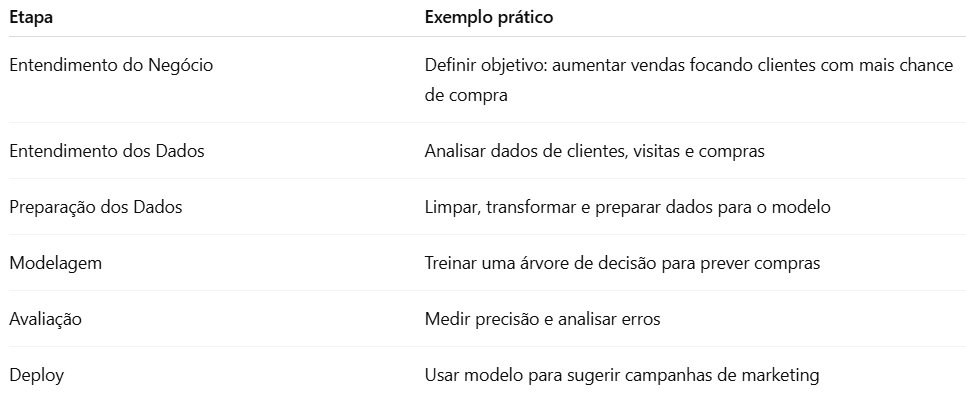

### ETAPA 6 - Deploy - Apenas um exemplo!

In [103]:
'''
Vamos usar uma ferramenta chamada Streamlit. Ela é perfeita para o seu objetivo, pois permite criar aplicações web com pouquíssimo código, de forma muito visual e prática, ideal para quem está começando.

Aqui está o plano, dividido em 4 partes:

1. Preparar o Notebook: Salvar o "cérebro" do nosso modelo e os pré-processadores.
2. Criar o Arquivo da Aplicação: Escrever o código Python (app.py) que será a nossa interface web.
3. Listar as Dependências: Criar um arquivo (requirements.txt) que diz ao servidor quais bibliotecas nosso código precisa.
4. Publicar na Web: Fazer o deploy de graça usando o Streamlit Community Cloud e o GitHub.
'''

'\nVamos usar uma ferramenta chamada Streamlit. Ela é perfeita para o seu objetivo, pois permite criar aplicações web com pouquíssimo código, de forma muito visual e prática, ideal para quem está começando.\n\nAqui está o plano, dividido em 4 partes:\n\n1. Preparar o Notebook: Salvar o "cérebro" do nosso modelo e os pré-processadores.\n2. Criar o Arquivo da Aplicação: Escrever o código Python (app.py) que será a nossa interface web.\n3. Listar as Dependências: Criar um arquivo (requirements.txt) que diz ao servidor quais bibliotecas nosso código precisa.\n4. Publicar na Web: Fazer o deploy de graça usando o Streamlit Community Cloud e o GitHub.\n'

In [104]:
'''
Parte 1: Preparar seu Notebook

Antes de criar a aplicação, precisamos salvar os componentes essenciais que você treinou no seu notebook. O mais importante é o modelo de Machine Learning e os "tradutores" de dados (LabelEncoder) que você usou.
'''

'\nParte 1: Preparar seu Notebook\n\nAntes de criar a aplicação, precisamos salvar os componentes essenciais que você treinou no seu notebook. O mais importante é o modelo de Machine Learning e os "tradutores" de dados (LabelEncoder) que você usou.\n'

In [105]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Carregar os dados
dados = pd.read_csv('bank-additional-full-ptbr.csv', sep=';')

# 2. Identificar colunas categóricas automaticamente (exceto a coluna alvo)
coluna_alvo = 'assinou_deposito'
colunas_categoricas = dados.select_dtypes(include='object').columns.tolist()
colunas_categoricas = [col for col in colunas_categoricas if col != coluna_alvo]

# 3. Aplicar LabelEncoder nas colunas categóricas
encoders = {}
for coluna in colunas_categoricas:
    le = LabelEncoder()
    dados[coluna] = le.fit_transform(dados[coluna])
    encoders[coluna] = le

# 4. Codificar a variável alvo
le_y = LabelEncoder()
dados[coluna_alvo] = le_y.fit_transform(dados[coluna_alvo])
encoders[coluna_alvo] = le_y

# 5. Separar X e y
x = dados.drop(coluna_alvo, axis=1)
y = dados[coluna_alvo]

# 6. Dividir em treino e teste com estratificação - preservar as mesmas proporções de exemplos em cada classe
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)

# 7. Normalizar os dados com StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 8. Subamostragem manual da classe majoritária no conjunto de treino

# Identifica índices das classes
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]

# Subamostra aleatoriamente a classe majoritária para equilibrar
np.random.seed(42)
class_0_sampled = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# Combina as amostras balanceadas
balanced_indices = np.concatenate([class_0_sampled, class_1_indices])

# Aplica o balanceamento nos dados
x_train_bal = x_train[balanced_indices]
y_train_bal = y_train.iloc[balanced_indices]

# 9. Treinar modelo SVM
svm_model = SVC(
    kernel='rbf',
    probability=True,               # Necessário para usar predict_proba()
    class_weight='balanced',       # Compensa o desbalanceamento
    random_state=42
)
svm_model.fit(x_train_bal, y_train_bal)

# 10. Salvar o modelo, scaler, encoders e colunas
joblib.dump(rf_model, 'modelo_svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoders, 'encoders.joblib')
joblib.dump(x.columns.tolist(), 'colunas_modelo.joblib')

print("✅ Modelo, scaler e encoders salvos com sucesso!")

✅ Modelo, scaler e encoders salvos com sucesso!


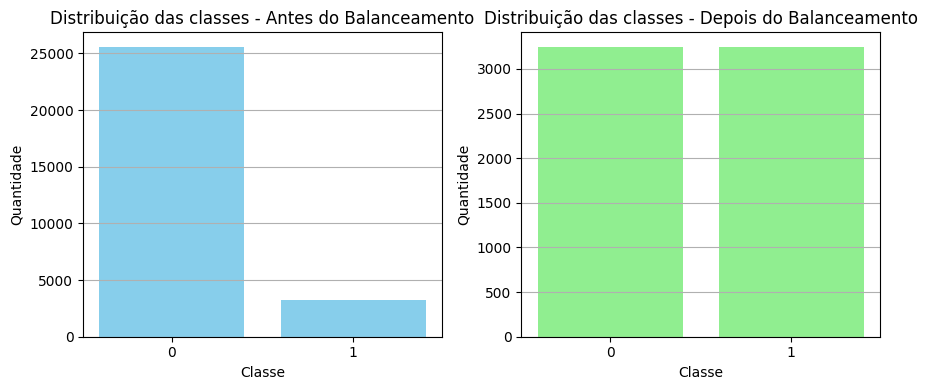

In [117]:
import matplotlib.pyplot as plt

# Contagem das classes antes do balanceamento
counts_before = y_train.value_counts().sort_index()
# Contagem das classes depois do balanceamento
counts_after = y_train_bal.value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Antes do balanceamento
axs[0].bar(counts_before.index.astype(str), counts_before.values, color='skyblue')
axs[0].set_title('Distribuição das classes - Antes do Balanceamento')
axs[0].set_xlabel('Classe')
axs[0].set_ylabel('Quantidade')
axs[0].grid(axis='y')

# Depois do balanceamento
axs[1].bar(counts_after.index.astype(str), counts_after.values, color='lightgreen')
axs[1].set_title('Distribuição das classes - Depois do Balanceamento')
axs[1].set_xlabel('Classe')
axs[1].set_ylabel('Quantidade')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [107]:
'''
Após executar essa célula, você terá 4 novos arquivos na mesma pasta do seu notebook. Eles são essenciais para a próxima etapa.
'''

'\nApós executar essa célula, você terá 4 novos arquivos na mesma pasta do seu notebook. Eles são essenciais para a próxima etapa.\n'

In [108]:
'''
Parte 2: Criar o Arquivo da Aplicação (app.py)

Agora, crie um novo arquivo de texto e salve-o com o nome app.py. Cole o seguinte código dentro dele. Este é o código da nossa aplicação web.
'''

'\nParte 2: Criar o Arquivo da Aplicação (app.py)\n\nAgora, crie um novo arquivo de texto e salve-o com o nome app.py. Cole o seguinte código dentro dele. Este é o código da nossa aplicação web.\n'

In [109]:
'''

import streamlit as st
import pandas as pd
import joblib

# Carregar o modelo, os encoders, as colunas e o scaler
try:
    model = joblib.load('modelo_svm_model.joblib')
    encoders = joblib.load('encoders.joblib')
    model_columns = joblib.load('colunas_modelo.joblib')
    scaler = joblib.load('scaler.joblib')  # ✅ carregando o scaler
except FileNotFoundError:
    st.error("Arquivos de modelo, encoders ou scaler não encontrados. Certifique-se de que estão na mesma pasta que o app.py.")
    st.stop()

# --- FUNÇÃO DE PRÉ-PROCESSAMENTO ---
def preprocess_input(data):
    # Cria um DataFrame com os dados do usuário
    user_df = pd.DataFrame([data])

    # Aplica os encoders nas colunas categóricas
    for column, encoder in encoders.items():
        if column in user_df.columns and column != 'assinou_deposito':
            valor_usuario = user_df[column].iloc[0]
            if valor_usuario in encoder.classes_:
                user_df[column] = encoder.transform([valor_usuario])[0]
            else:
                st.error(f"Valor '{valor_usuario}' não encontrado no encoder da coluna '{column}'.")
                st.stop()

    # Garante a estrutura correta das colunas
    processed_df = pd.DataFrame(columns=model_columns)
    processed_df.loc[0] = 0  # Inicializa todas as colunas com zero

    for col in user_df.columns:
        if col in processed_df.columns:
            processed_df[col] = user_df[col].values[0]

    # ✅ Aplica o scaler para normalizar os dados
    processed_scaled = scaler.transform(processed_df)

    return processed_scaled

# --- INTERFACE DO USUÁRIO COM STREAMLIT ---

st.set_page_config(page_title="Previsão de Marketing Bancário", layout="wide")
st.title('🤖 Aplicação de Previsão de Adesão a uma Campanha Bancária')
st.title('Por: Professor Carlos Santos - Instituto Federal Farroupilha Câmpus Alegrete')
st.write('Esta aplicação utiliza um modelo de Machine Learning (SVM) para prever se um cliente irá aderir a uma campanha de marketing de um banco.')
st.write('Preencha os dados do cliente abaixo para receber a previsão.')

st.divider()

# Criando colunas para organizar os campos de entrada
col1, col2, col3 = st.columns(3)

# Dicionário para armazenar as entradas do usuário
user_input = {}

with col1:
    st.subheader("Informações Pessoais")
    user_input['idade'] = st.number_input('Idade', min_value=18, max_value=100, value=40)
    user_input['profissao'] = st.selectbox('Profissão', options=encoders['profissao'].classes_)
    user_input['estado_civil'] = st.selectbox('Estado Civil', options=encoders['estado_civil'].classes_)
    user_input['escolaridade'] = st.selectbox('Escolaridade', options=encoders['escolaridade'].classes_)

with col2:
    st.subheader("Histórico com o Banco")
    user_input['inadimplente'] = st.selectbox('Possui Inadimplência?', options=encoders['inadimplente'].classes_)
    user_input['saldo_medio_anual'] = st.number_input('Saldo Médio Anual (em Euros)', value=1500)
    user_input['emprestimo_habitacional'] = st.selectbox('Possui Empréstimo Imobiliário?', options=encoders['emprestimo_habitacional'].classes_)
    user_input['emprestimo_pessoal'] = st.selectbox('Possui Empréstimo Pessoal?', options=encoders['emprestimo_pessoal'].classes_)

with col3:
    st.subheader("Última Campanha")
    user_input['tipo_contato'] = st.selectbox('Meio de Contato', options=encoders['tipo_contato'].classes_)
    user_input['mes_contato'] = st.selectbox('Último Mês de Contato', options=encoders['mes_contato'].classes_)
    user_input['duracao_contato'] = st.number_input('Duração do Último Contato (segundos)', value=200, min_value=0)
    user_input['numero_contatos'] = st.number_input('Nº de Contatos Nesta Campanha', value=1, min_value=1)
    user_input['dias_ultimo_contato'] = st.number_input('Dias Desde o Último Contato (campanha anterior)', value=-1, min_value=-1)
    user_input['contatos_anteriores'] = st.number_input('Nº de Contatos (campanha anterior)', value=0, min_value=0)
    user_input['resultado_campanha_anterior'] = st.selectbox('Resultado da Campanha Anterior', options=encoders['resultado_campanha_anterior'].classes_)

# Botão de Previsão
if st.button('Fazer Previsão', type="primary"):
    processed_data = preprocess_input(user_input)
    prediction_proba = model.predict_proba(processed_data)[0][1]  # probabilidade da classe "sim"
    threshold = 0.3
    prediction = int(prediction_proba >= threshold)

    st.divider()
    st.subheader('Resultado da Previsão:')

    resultado_texto = encoders['assinou_deposito'].inverse_transform([prediction])[0]

    if resultado_texto == 'yes':
        st.success('O cliente provavelmente VAI ADERIR à campanha! ✅')
        st.write(f"**Confiança da Previsão:** {prediction_proba*100:.2f}%")
    else:
        st.error('O cliente provavelmente NÃO VAI ADERIR à campanha. ❌')
        st.write(f"**Confiança da Previsão:** {(1 - prediction_proba)*100:.2f}%")



'''

'\n\nimport streamlit as st\nimport pandas as pd\nimport joblib\n\n# Carregar o modelo, os encoders, as colunas e o scaler\ntry:\n    model = joblib.load(\'modelo_svm_model.joblib\')\n    encoders = joblib.load(\'encoders.joblib\')\n    model_columns = joblib.load(\'colunas_modelo.joblib\')\n    scaler = joblib.load(\'scaler.joblib\')  # ✅ carregando o scaler\nexcept FileNotFoundError:\n    st.error("Arquivos de modelo, encoders ou scaler não encontrados. Certifique-se de que estão na mesma pasta que o app.py.")\n    st.stop()\n\n# --- FUNÇÃO DE PRÉ-PROCESSAMENTO ---\ndef preprocess_input(data):\n    # Cria um DataFrame com os dados do usuário\n    user_df = pd.DataFrame([data])\n\n    # Aplica os encoders nas colunas categóricas\n    for column, encoder in encoders.items():\n        if column in user_df.columns and column != \'assinou_deposito\':\n            valor_usuario = user_df[column].iloc[0]\n            if valor_usuario in encoder.classes_:\n                user_df[column] = e

In [110]:
'''
Parte 3: Listar as Dependências (requirements.txt)

Crie outro arquivo de texto, chamado requirements.txt. Ele informa ao servidor de quais bibliotecas Python sua aplicação precisa para funcionar.
Cole o seguinte conteúdo nele:
'''

'\nParte 3: Listar as Dependências (requirements.txt)\n\nCrie outro arquivo de texto, chamado requirements.txt. Ele informa ao servidor de quais bibliotecas Python sua aplicação precisa para funcionar.\nCole o seguinte conteúdo nele:\n'

In [111]:
'''

pandas
scikit-learn
streamlit
joblib

'''

'\n\npandas\nscikit-learn\nstreamlit\njoblib\n\n'

In [112]:
'''
Obs: As versões são importantes para garantir a compatibilidade. Essas são versões recentes e estáveis.
'''

'\nObs: As versões são importantes para garantir a compatibilidade. Essas são versões recentes e estáveis.\n'

In [113]:
'''

Parte 4: Publicar na Web (O Deploy)

Esta é a parte final! Vamos colocar sua aplicação no ar de graça.

Pré-requisitos:

Você precisa de uma conta no GitHub. Se não tiver, crie uma, é grátis.
Passos:

1. Crie um Repositório no GitHub:

 - Vá para o GitHub e crie um novo repositório público. Dê um nome a ele, como previsao-marketing-app.

2. Faça o Upload dos Arquivos:

 - No repositório que você acabou de criar, faça o upload dos 6 arquivos que temos:
   - app.py (sua aplicação web)
   - requirements.txt (as dependências)
   - modelo_random_forest.joblib (o modelo salvo)
   - encoders.joblib (os encoders salvos)
   - scaler.joblib
   - colunas_modelo.joblib (a lista de colunas)

3. Faça o Deploy com o Streamlit Community Cloud:

 - Vá para o site: share.streamlit.io
 - Clique em "Sign in with GitHub" e autorize o acesso.
 - Clique no botão "New app".
 - No campo "Repository", escolha o repositório que você criou.
 - O Streamlit vai preencher automaticamente o nome do arquivo principal (app.py).
 - Clique no botão "Deploy!".

Pronto! O Streamlit vai começar a instalar as dependências e configurar sua aplicação. Em 1 ou 2 minutos, você terá um link público para sua aplicação web interativa, que poderá compartilhar com qualquer pessoa!

'''

'\n\nParte 4: Publicar na Web (O Deploy)\n\nEsta é a parte final! Vamos colocar sua aplicação no ar de graça.\n\nPré-requisitos:\n\nVocê precisa de uma conta no GitHub. Se não tiver, crie uma, é grátis.\nPassos:\n\n1. Crie um Repositório no GitHub:\n\n - Vá para o GitHub e crie um novo repositório público. Dê um nome a ele, como previsao-marketing-app.\n\n2. Faça o Upload dos Arquivos:\n\n - No repositório que você acabou de criar, faça o upload dos 6 arquivos que temos:\n   - app.py (sua aplicação web)\n   - requirements.txt (as dependências)\n   - modelo_random_forest.joblib (o modelo salvo)\n   - encoders.joblib (os encoders salvos)\n   - scaler.joblib\n   - colunas_modelo.joblib (a lista de colunas)\n\n3. Faça o Deploy com o Streamlit Community Cloud:\n\n - Vá para o site: share.streamlit.io\n - Clique em "Sign in with GitHub" e autorize o acesso.\n - Clique no botão "New app".\n - No campo "Repository", escolha o repositório que você criou.\n - O Streamlit vai preencher automatica